In [21]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [22]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv('D:/self/Logistic regression on Portugese bank/targeted-marketing-predictive-engine-master/banking.csv', header = 0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

data.head()

data['education'].unique()

data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

data['education'].unique()

data['y'].value_counts()

data.groupby('job').mean()
data.groupby('marital').mean()
data.groupby('education').mean()

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


In [23]:
print(list(data.columns))

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [24]:
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [25]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var, drop_first=True)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [26]:
data_final = data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success'], dtype=object)

In [27]:
data_final.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [28]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
os = SMOTE(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
columns = X.columns

In [31]:
os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data = os_data_X, columns=columns)
os_data_y = pd.DataFrame(data = os_data_y, columns= ['y'])

C:\Users\Hitesh.Laddha\AppData\Local\conda\conda\envs\my_root\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
print("number of non subscription samples : ", len(os_data_y[os_data_y['y'] == 0]))

number of non subscription samples :  27392


In [33]:
print("number of subscription samples : ", len(os_data_y[os_data_y['y'] == 1]))

number of subscription samples :  27392


In [34]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [35]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False  True False False False
  True False  True False False  True False False  True False False  True
 False  True False  True False  True False False False False False False
 False  True  True  True  True  True False  True  True  True False False
  True  True  True]
[31 29 17 30 28  9 18 27  1 25  3 20  1  4  1 13  6  1  5 12  1 21 16  1 10
  1 11  1  7  1 32 14 15 19 22  8 26  1  1  1  1  1  2  1  1  1 23 24  1  1
  1]


In [36]:
print(rfe.n_features_)

20


In [37]:
columns = np.array(columns)
selected_columns = columns[np.array(rfe.support_)]
X = os_data_X[selected_columns]
y = os_data_y['y']

In [38]:
import statsmodels.api as sm
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.548193
         Iterations 7
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.209     
Dependent Variable:      y                   AIC:                 60104.4368
Date:                    2019-04-10 15:00    BIC:                 60282.6599
No. Observations:        54784               Log-Likelihood:      -30032.   
Df Model:                19                  LL-Null:             -37973.   
Df Residuals:            54764               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          7.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
eurib

In [42]:
#remove the features with p-value > 0.05
selected_columns = [i for i in selected_columns if i != 'job_housemaid']

In [45]:
X = os_data_X[selected_columns]
y = os_data_y['y']

In [46]:
import statsmodels.api as sm
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.548213
         Iterations 7
                               Results: Logit
Model:                   Logit               Pseudo R-squared:    0.209     
Dependent Variable:      y                   AIC:                 60104.6161
Date:                    2019-04-10 15:17    BIC:                 60273.9280
No. Observations:        54784               Log-Likelihood:      -30033.   
Df Model:                18                  LL-Null:             -37973.   
Df Residuals:            54765               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          7.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
eurib

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
y_pred = logreg.predict(X_test)

In [71]:
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.7397


In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[4418 1059]
 [1793 3687]]


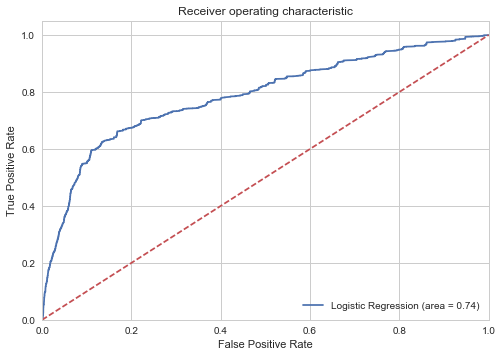

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [74]:
import os
os.environ['PATH']

'C:\\Users\\Hitesh.Laddha\\AppData\\Local\\conda\\conda\\envs\\my_root\\Library\\bin;C:\\Users\\Hitesh.Laddha\\AppData\\Local\\conda\\conda\\envs\\my_root\\Library\\bin;C:\\Users\\Hitesh.Laddha\\AppData\\Local\\conda\\conda\\envs\\my_root\\Scripts;C:\\Users\\Hitesh.Laddha\\AppData\\Local\\conda\\conda\\envs\\my_root\\Library\\bin;C:\\Users\\Hitesh.Laddha\\AppData\\Local\\conda\\conda\\envs\\my_root;C:\\Users\\Hitesh.Laddha\\AppData\\Local\\conda\\conda\\envs\\my_root\\Library\\mingw-w64\\bin;C:\\Users\\Hitesh.Laddha\\AppData\\Local\\conda\\conda\\envs\\my_root\\Library\\usr\\bin;C:\\Users\\Hitesh.Laddha\\AppData\\Local\\conda\\conda\\envs\\my_root\\Library\\bin;C:\\Users\\Hitesh.Laddha\\AppData\\Local\\conda\\conda\\envs\\my_root\\Scripts;C:\\Users\\Hitesh.Laddha\\AppData\\Local\\conda\\conda\\envs\\my_root\\bin;C:\\ProgramData\\Anaconda3\\condabin;C:\\ProgramData\\Oracle\\Java\\javapath;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerSh